FTHG : Full time home goals. 
FTAG : Full time away goals. 
FTR : Full time Result. 
HTHG : Half time home goals. 
HTAG : Half time home goals. 
HTR : Half time home goals. 
HS : Home team shots. 
AS : Away team shots. 
HST : Home team shots on target. 
AST : Away team shots on target. 
HC : Home team corners. 
AC : Away team corners. 
HF : Home team Fouls. 
AF : Away team Fouls. 
HY : Home team yellow cards. 
AY : Away team yellow cards. 
HR : Home team red cards. 
AR : Away team red cards.

In [325]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

In [326]:
dataset = pd.read_csv("results.csv", encoding="unicode_escape")
dataset.sample(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10791,2020-21,2021-05-19T19:00:00Z,Crystal Palace,Arsenal,1,3,A,0.0,1.0,A,...,6.0,3.0,6.0,7.0,7.0,7.0,2.0,1.0,0.0,0.0
4426,2004-05,2004-10-16T00:00:00Z,Bolton,Crystal Palace,1,0,H,1.0,0.0,H,...,7.0,2.0,7.0,3.0,19.0,14.0,1.0,1.0,0.0,0.0
3026,2000-01,2000-12-30T00:00:00Z,Middlesbrough,Coventry,1,1,D,0.0,1.0,A,...,6.0,3.0,4.0,3.0,9.0,16.0,1.0,3.0,0.0,0.0
4889,2005-06,2005-12-18T00:00:00Z,Arsenal,Chelsea,0,2,A,0.0,1.0,A,...,5.0,8.0,5.0,5.0,13.0,18.0,3.0,4.0,0.0,0.0
7057,2011-12,2011-09-24T00:00:00Z,Newcastle,Blackburn,3,1,H,2.0,1.0,H,...,8.0,1.0,4.0,2.0,6.0,16.0,0.0,4.0,0.0,1.0


There are some some NaN values

In [327]:
dataset.shape

(11113, 23)

total 11113 matches since 1991 with 23 features

In [328]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [329]:
# droping null values
data = dataset.dropna()

In [330]:
data.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8289 entries, 2824 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    8289 non-null   object 
 1   DateTime  8289 non-null   object 
 2   HomeTeam  8289 non-null   object 
 3   AwayTeam  8289 non-null   object 
 4   FTHG      8289 non-null   int64  
 5   FTAG      8289 non-null   int64  
 6   FTR       8289 non-null   object 
 7   HTHG      8289 non-null   float64
 8   HTAG      8289 non-null   float64
 9   HTR       8289 non-null   object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   float

8289 matches with 23 features

In [332]:
# # extracting DateTime column for better analysis
# data["Month"] = pd.DatetimeIndex(data["DateTime"]).month
# data["Day"] = pd.DatetimeIndex(data["DateTime"]).day
# # data = data.drop('DateTime', axis = 1)
# data.head()

In [333]:
data.describe(include=["O"])

,Season,DateTime,HomeTeam,AwayTeam,FTR,HTR,Referee
count,8289,8289,8289,8289,8289,8289,8289
unique,22,2675,44,44,3,3,158
top,2000-01,2014-12-26T00:00:00Z,Man United,Liverpool,H,D,M Dean
freq,380,10,415,415,3803,3420,523


44 teams participated in 22 seasons 

In [334]:
data["target"] = (data["FTR"] == "H").astype("int")
data["HTRcode"] = (data["HTR"] == "H").astype("int")
# data["FTAG"] = data["FTAG"].astype(float)
# data["FTHG"] = data["FTHG"].astype(float)
data

/tmp/ipykernel_14687/3391575216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["target"] = (data["FTR"] == "H").astype("int")
/tmp/ipykernel_14687/3391575216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HTRcode"] = (data["HTR"] == "H").astype("int")


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HY,AY,HR,AR,target,HTRcode
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,1,1
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,1,1
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,0,0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,0,0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,0,0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,1,0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,1,1
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,1,1


In [335]:
del data["Referee"]
del data["FTR"]
del data["HTR"]

In [336]:
data["HomeTeam"] = data["HomeTeam"].astype("category").cat.codes
data["AwayTeam"] = data["AwayTeam"].astype("category").cat.codes
data.head()

/tmp/ipykernel_14687/3948445456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HomeTeam"] = data["HomeTeam"].astype("category").cat.codes
/tmp/ipykernel_14687/3948445456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["AwayTeam"] = data["AwayTeam"].astype("category").cat.codes


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,...,HC,AC,HF,AF,HY,AY,HR,AR,target,HTRcode
2824,2000-01,2000-08-19T00:00:00Z,12,25,4,0,2.0,0.0,17.0,8.0,...,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,1,1
2825,2000-01,2000-08-19T00:00:00Z,13,41,4,2,1.0,0.0,17.0,12.0,...,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,1,1
2826,2000-01,2000-08-19T00:00:00Z,14,27,1,3,1.0,1.0,6.0,16.0,...,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,0,0
2827,2000-01,2000-08-19T00:00:00Z,16,34,2,2,1.0,2.0,6.0,13.0,...,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,0,0
2828,2000-01,2000-08-19T00:00:00Z,22,17,2,0,2.0,0.0,17.0,12.0,...,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,1,1


In [337]:
predictors = [
    "HomeTeam",
    "AwayTeam",
    "HTHG",
    "HTAG",
    "HS",
    "AS",
    "HST",
    "AST",
    "HC",
    "AC",
    "HF",
    "AF",
    "HY",
    "AY",
    "HR",
    "AR",
    "HTRcode"
]
X = data[predictors]
y = data["target"]



In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [339]:
input_dim = X_train.shape[1]
output_dim = 1

In [340]:
X_train

,HomeTeam,AwayTeam,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTRcode
4176,34,22,2.0,0.0,18.0,11.0,6.0,6.0,1.0,6.0,16.0,8.0,1.0,1.0,0.0,0.0,1
11037,26,9,0.0,0.0,19.0,10.0,7.0,3.0,10.0,2.0,8.0,10.0,3.0,1.0,0.0,1.0,0
7686,41,40,2.0,0.0,14.0,17.0,8.0,11.0,5.0,3.0,10.0,13.0,1.0,1.0,0.0,1.0,1
8847,15,17,0.0,0.0,18.0,9.0,6.0,5.0,10.0,7.0,7.0,9.0,0.0,1.0,0.0,1.0,0
4855,17,28,0.0,0.0,14.0,16.0,9.0,10.0,12.0,8.0,19.0,19.0,1.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,25,39,0.0,0.0,18.0,7.0,5.0,0.0,9.0,3.0,9.0,12.0,1.0,2.0,0.0,0.0,0
8015,20,34,0.0,0.0,12.0,16.0,4.0,7.0,2.0,2.0,6.0,8.0,0.0,3.0,0.0,0.0,0
8214,0,20,1.0,1.0,25.0,4.0,9.0,4.0,10.0,0.0,9.0,13.0,2.0,2.0,0.0,0.0,0
3684,2,25,0.0,1.0,9.0,8.0,4.0,4.0,6.0,1.0,10.0,16.0,2.0,2.0,0.0,0.0,0


In [341]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [342]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.01)

In [343]:
activation_functions = ['sigmoid', 'tanh', 'relu','leaky_relu']
num_hidden_layers = [1, 2]

In [344]:
def create_and_train_model(activation_func, num_layers):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(64, activation=activation_func))
    
    model.add(tf.keras.layers.Dense(1))  # Output layer for regression

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    return model, history

In [351]:
def create_and_train_mlp(activation_func):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    model.add(tf.keras.layers.Dense(128, activation=activation_func))
    model.add(tf.keras.layers.Dense(64, activation=activation_func))
    model.add(tf.keras.layers.Dense(32, activation=activation_func))
    
    model.add(tf.keras.layers.Dense(1, activation='linear'))  # Output layer for regression

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    return model, history

In [345]:
models = []
histories = []

In [346]:
for activation_func in activation_functions:
    for num_layers in num_hidden_layers:
        model, history = create_and_train_model(activation_func, num_layers)
        models.append(model)
        histories.append(history)

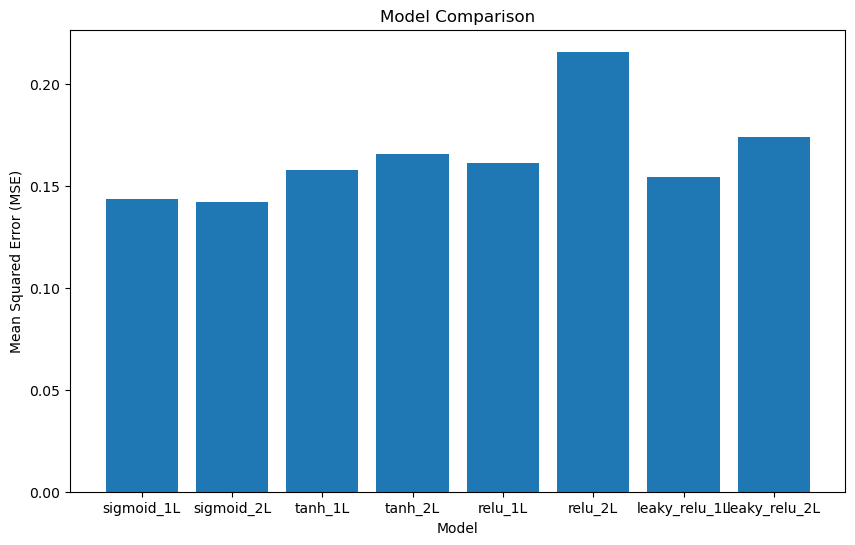

In [347]:
mse_scores = []

for model in models:
    mse = model.evaluate(X_test, y_test, verbose=0)
    mse_scores.append(mse)

mse_scores = []

for model in models:
    mse = model.evaluate(X_test, y_test, verbose=0)
    mse_scores.append(mse)

# Plot the MSE scores for different models
plt.figure(figsize=(10, 6))
plt.bar(range(len(mse_scores)), mse_scores, tick_label=[f'{act}_{layers}L' for act in activation_functions for layers in num_hidden_layers])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison')
plt.show()

 1/52 [..............................] - ETA: 2s

52/52 [==============================] - 0s 2ms/step


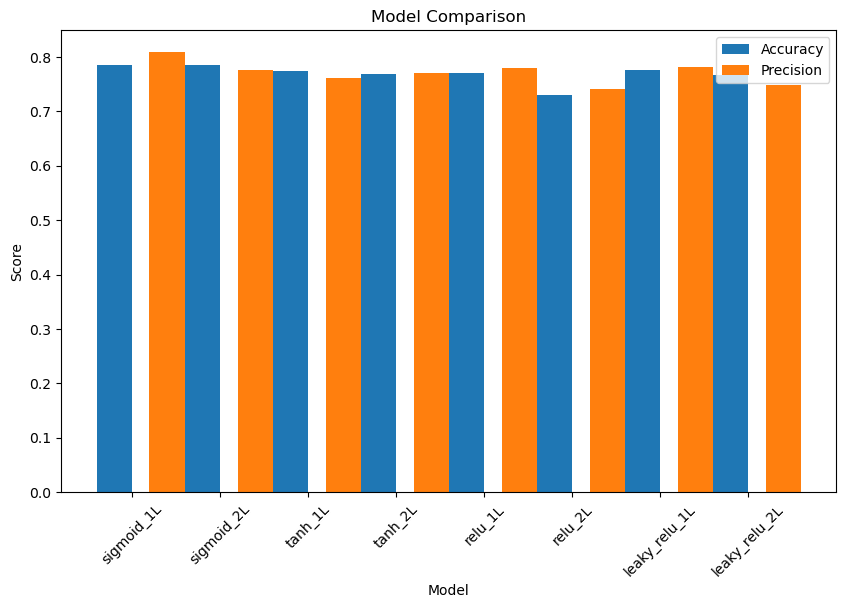

In [348]:
accuracy_scores = []
precision_scores = []

for model in models:
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

# Plot accuracy and precision for different models
plt.figure(figsize=(10, 6))
x_labels = [f'{act}_{layers}L' for act in activation_functions for layers in num_hidden_layers]
x = range(len(x_labels))

plt.bar(x, accuracy_scores, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], precision_scores, width=0.4, label='Precision', align='edge')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks([i + 0.2 for i in x], x_labels, rotation=45)
plt.legend()
plt.show()

In [349]:
accuracy_scores = []
precision_scores = []

best_model_idx = None
best_accuracy = 0
best_precision = 0

for idx, model in enumerate(models):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_model_idx = idx

# Plot accuracy and precision for different models
# ... (rest of the code)

# Print which activation function performed the best
best_activation = activation_functions[best_model_idx // len(num_hidden_layers)]
best_hidden_layers = num_hidden_layers[best_model_idx % len(num_hidden_layers)]
print(f"The best model used '{best_activation}' activation function with {best_hidden_layers} hidden layer(s).")
print(f"Best Model Accuracy: {best_accuracy}")
print(f"Best Model Precision: {best_precision}")

 1/52 [..............................] - ETA: 1s

52/52 [==============================] - 0s 1ms/step
The best model used 'sigmoid' activation function with 2 hidden layer(s).
Best Model Accuracy: 0.7858866103739445
Best Model Precision: 0.7760210803689065


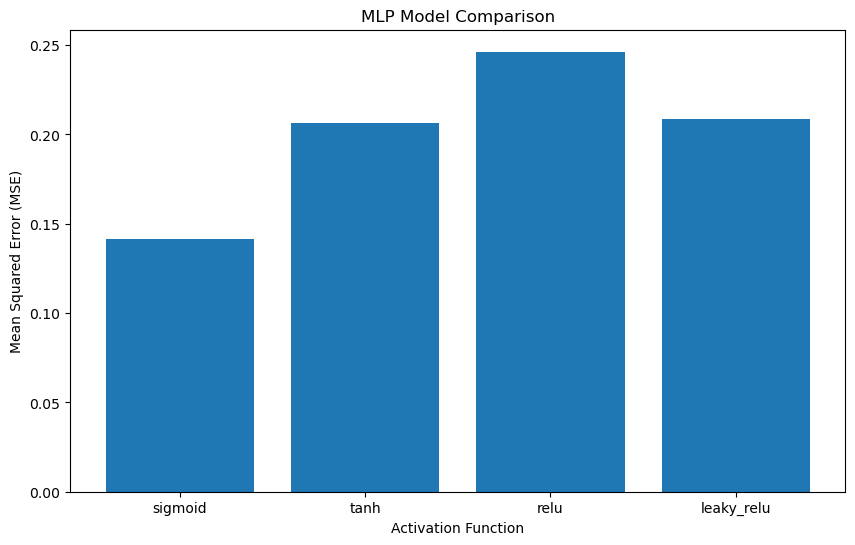

In [350]:
models = []
histories = []

for activation_func in activation_functions:
    model, history = create_and_train_mlp(activation_func)
    models.append(model)
    histories.append(history)

# Evaluate and compare the models
mse_scores = []

for model in models:
    mse = model.evaluate(X_test, y_test, verbose=0)
    mse_scores.append(mse)

# Plot the MSE scores for different models
plt.figure(figsize=(10, 6))
plt.bar(range(len(mse_scores)), mse_scores, tick_label=activation_functions)
plt.xlabel('Activation Function')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MLP Model Comparison')
plt.show()

52/52 [==============================] - 0s 2ms/step


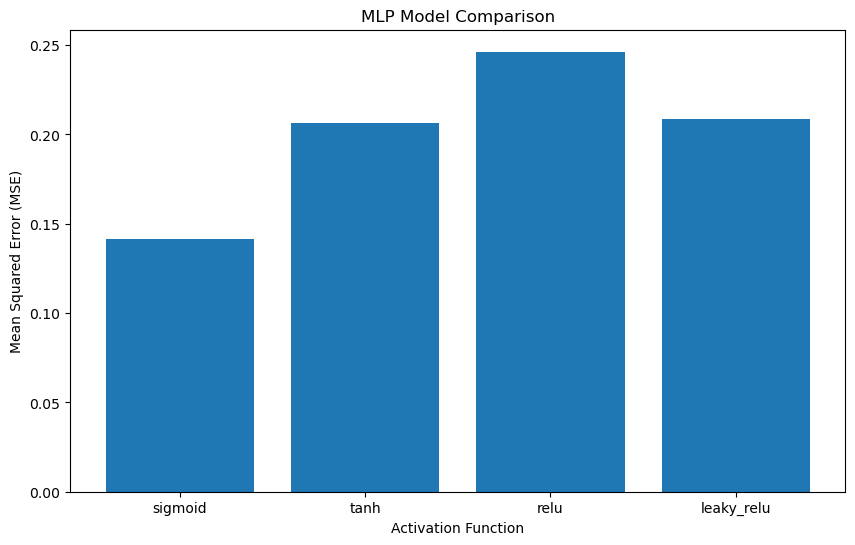

Activation Function: sigmoid
Accuracy: 0.7864897466827503
Precision: 0.7777777777777778
---------------
Activation Function: tanh
Accuracy: 0.7388419782870929
Precision: 0.7211413748378729
---------------
Activation Function: relu
Accuracy: 0.7231604342581424
Precision: 0.7027027027027027
---------------
Activation Function: leaky_relu
Accuracy: 0.7394451145958987
Precision: 0.750733137829912
---------------


In [352]:
mse_scores = []
accuracies = []
precisions = []

for model in models:
    y_pred = model.predict(X_test)
    
    # Convert regression predictions to binary classification
    y_pred_binary = (y_pred >= 0.5).astype(int)
    y_test_binary = (y_test >= 0.5).astype(int)
    
    mse = model.evaluate(X_test, y_test, verbose=0)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    
    mse_scores.append(mse)
    accuracies.append(accuracy)
    precisions.append(precision)

# Plot the MSE scores for different models
plt.figure(figsize=(10, 6))
plt.bar(range(len(mse_scores)), mse_scores, tick_label=activation_functions)
plt.xlabel('Activation Function')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MLP Model Comparison')
plt.show()

# Print accuracy and precision
for i in range(len(activation_functions)):
    print(f"Activation Function: {activation_functions[i]}")
    print(f"Accuracy: {accuracies[i]}")
    print(f"Precision: {precisions[i]}")
    print("---------------")